Иморитирование библиотек

In [25]:
import pandas as pd
import os, warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

Смотрим исходные данные

Анализ данных для train:
          client_id        target      col1      col2       col3       col4  \
count  14456.000000  14456.000000  3.000000  6.000000  12.000000  19.000000   
mean    2853.066270      0.030160  0.333333  0.500000   0.306548   0.346140   
std     1957.002315      0.171035  0.577350  0.547723   0.460514   0.452933   
min        1.000000      0.000000  0.000000  0.000000   0.000000   0.000000   
25%     1186.000000      0.000000  0.000000  0.000000   0.000000   0.000000   
50%     2568.000000      0.000000  0.000000  0.500000   0.000000   0.000000   
75%     4258.250000      0.000000  0.500000  1.000000   0.758929   0.839286   
max     8302.000000      1.000000  1.000000  1.000000   1.000000   1.000000   

            col5       col6          col7          col8  ...       col2654  \
count        1.0        1.0  3.000000e+00  8.000000e+00  ...  6.207000e+03   
mean   7464071.0  7464071.0  4.762016e+06  4.127563e+06  ...  6.951439e+06   
std          NaN        NaN  

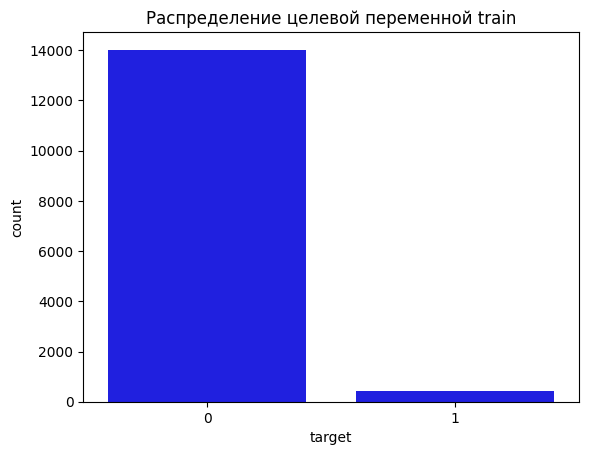

Анализ данных для valid:
         client_id       target  col1  col2  col3  col4  col5  col6  \
count  3642.000000  3642.000000   0.0   2.0   4.0  10.0   0.0   0.0   
mean   3289.155958     0.018122   NaN   0.0   0.0   0.0   NaN   NaN   
std    2157.443098     0.133411   NaN   0.0   0.0   0.0   NaN   NaN   
min       2.000000     0.000000   NaN   0.0   0.0   0.0   NaN   NaN   
25%    1397.250000     0.000000   NaN   0.0   0.0   0.0   NaN   NaN   
50%    3078.500000     0.000000   NaN   0.0   0.0   0.0   NaN   NaN   
75%    4888.500000     0.000000   NaN   0.0   0.0   0.0   NaN   NaN   
max    8300.000000     1.000000   NaN   0.0   0.0   0.0   NaN   NaN   

            col7          col8  ...       col2654       col2655       col2656  \
count        1.0  2.000000e+00  ...  1.038000e+03  1.038000e+03  1.038000e+03   
mean   3689700.0  3.521610e+06  ...  8.448288e+06  8.333270e+06  8.391739e+06   
std          NaN  2.377152e+05  ...  4.975790e+06  4.953887e+06  4.951622e+06   
min    3689

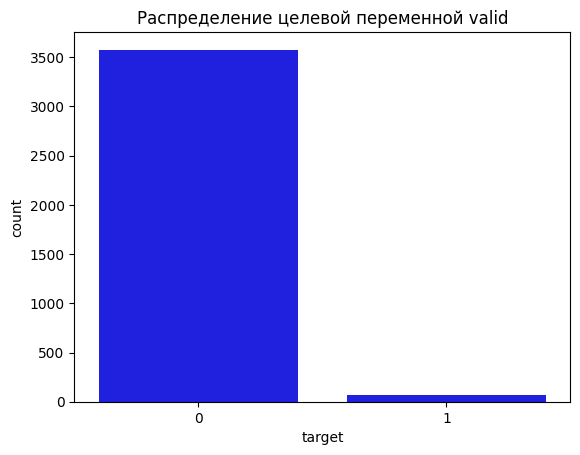

In [26]:
train = pd.read_csv("df/train.csv", low_memory=False)
valid = pd.read_csv("df/valid.csv", low_memory=False)

arr = [train, valid]
names_df = ['train', 'valid']

# Анализ данных
def analyze_data(df, num):
    # print(df.describe()) выводит сводную статистику для числовых столбцов в DataFrame, 
    # включая такие параметры, как количество значений, среднее, стандартное отклонение, 
    # минимальное и максимальное значения.

    print(df.describe())
    sns.countplot(x='target', data=df, color='blue')
    plt.title(f'Распределение целевой переменной {names_df[num]}')
    plt.show()

    # count: Количество непустых (не NaN) значений для каждого столбца.
    # mean: Среднее значение для каждого столбца.
    # std: Стандартное отклонение, показывающее, насколько значения в столбце разбросаны относительно среднего.
    # min: Минимальное значение в столбце.
    # 25%: 25-й процентиль (первый квартиль), значение, ниже которого находится 25% данных.
    # 50%: Медиана (50-й процентиль), значение, которое делит данные пополам.
    # 75%: 75-й процентиль (третий квартиль), значение, ниже которого находится 75% данных.
    # max: Максимальное значение в столбце.

for i, elem in enumerate(arr):
    print(f'Анализ данных для {names_df[i]}:')
    analyze_data(elem, i)

def perenos():
     if i == 0:
          print('\n*******************************************************************************\n')

def perenos_ ():
      print('\n*******************************************************************************\n')

In [27]:
for i, elem in enumerate(arr):
     # Вывод info для просмотра типов табл и их колво
     print(f'Инфо {names_df[i]}')
     elem.info()

     # Вывод строк + столб кол-во
     print(f"\n{names_df[i]} имеет: {elem.shape[0]} строк, {elem.shape[1]} столбцов")
     
     # Выводим колонки с разными типами данных
     numeric_columns = elem.select_dtypes(include=['int64', 'float64']).columns
     categorical_columns = elem.select_dtypes(include=['object']).columns
     boolean_columns = elem.select_dtypes(include=['bool']).columns

     print(f"\nЧисловые колонки в {names_df[i]}: {len(numeric_columns)}")
     print(f"Категориальные колонки в {names_df[i]}: {len(categorical_columns)}")
     print(f"Булевые колонки в {names_df[i]}: {len(boolean_columns)}")

     perenos()

Инфо train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Columns: 2666 entries, report_date to col2663
dtypes: float64(2316), int64(3), object(347)
memory usage: 294.0+ MB

train имеет: 14456 строк, 2666 столбцов

Числовые колонки в train: 2319
Категориальные колонки в train: 347
Булевые колонки в train: 0

*******************************************************************************

Инфо valid
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642 entries, 0 to 3641
Columns: 2666 entries, report_date to col2663
dtypes: float64(2329), int64(3), object(334)
memory usage: 74.1+ MB

valid имеет: 3642 строк, 2666 столбцов

Числовые колонки в valid: 2332
Категориальные колонки в valid: 334
Булевые колонки в valid: 0


Смотрим пропущенные значения

In [28]:
def neznay(train_data, valid_data):
    isxod_train = train_data.isnull().sum()
    isxod_valid = valid_data.isnull().sum()

    # Объединяем результаты в DataFrame
    combined_isxod = pd.concat([isxod_train, isxod_valid], axis=1)
    combined_isxod.columns = ['Train', 'Valid']

    # Выводим результаты
    print(combined_isxod)

neznay(train, valid)

             Train  Valid
report_date      0      0
client_id        0      0
target           0      0
col1         14453   3642
col2         14450   3640
...            ...    ...
col2659      13950   3578
col2660       6420   1280
col2661       6420   1280
col2662       6420   1280
col2663          0      0

[2666 rows x 2 columns]


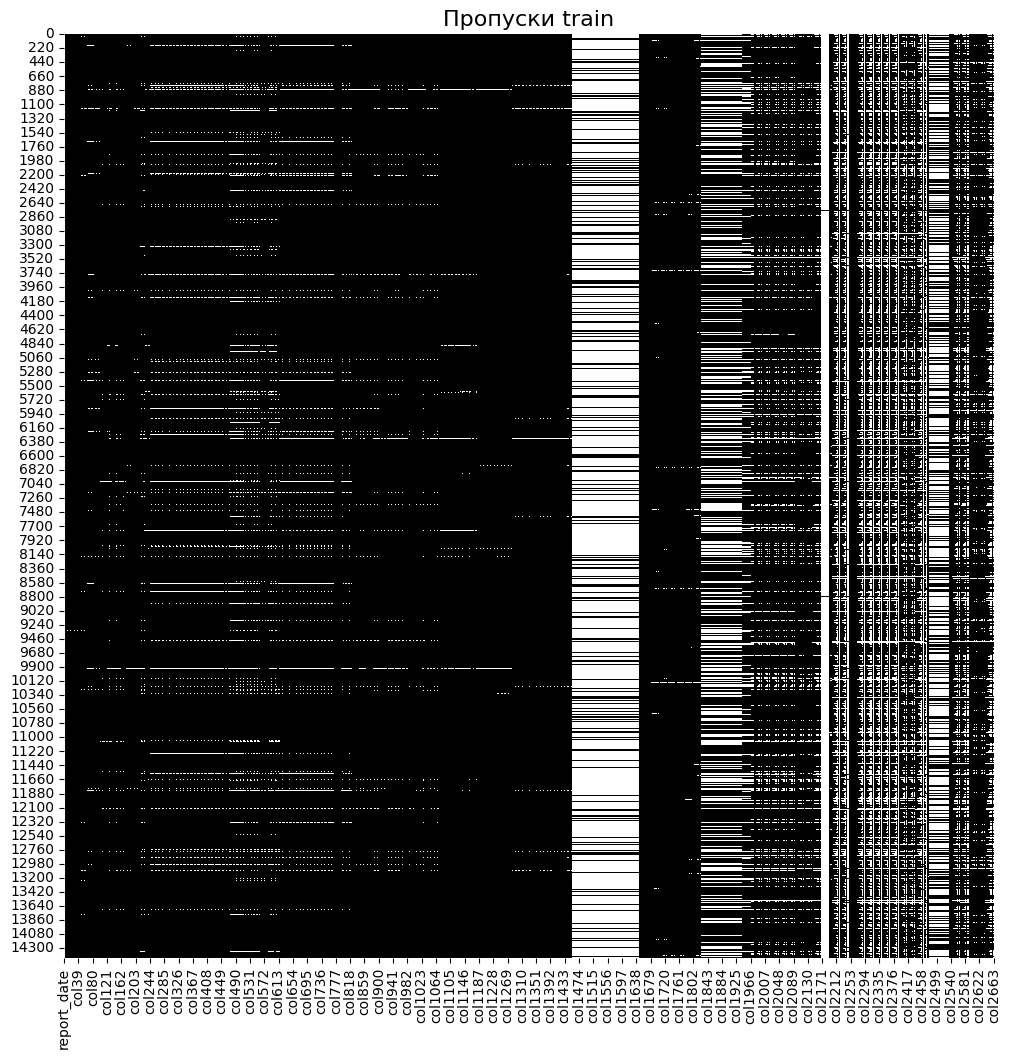

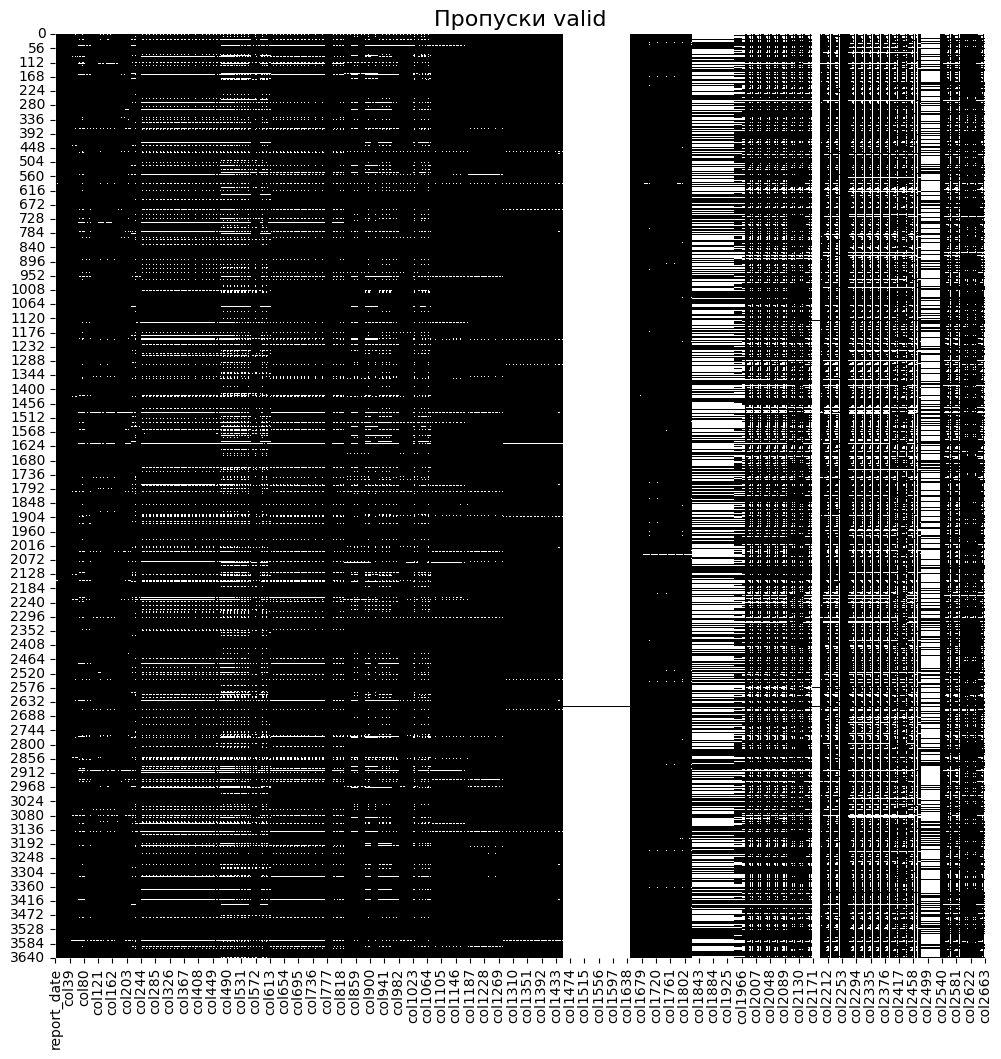

In [29]:
for i, elem in enumerate(arr): 
      fig, ax = plt.subplots(figsize=(12, 12))
      sns.heatmap(elem.isnull(), cbar = False, cmap = 'Greys')
      plt.title(f"Пропуски {names_df[i]}", fontsize=16)
      plt.show()

In [30]:
train.head()

,report_date,client_id,target,col1,col2,col3,col4,col5,col6,col7,...,col2654,col2655,col2656,col2657,col2658,col2659,col2660,col2661,col2662,col2663
0,2022-11-01,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
1,2022-11-01,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7616803.0,7616803.0,7616803.0,NaN,NaN,NaN,7616803.0,7616803.0,7616803.0,0.256261
2,2022-05-01,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
3,2022-09-01,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258682
4,2022-08-01,8,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254164


In [31]:
valid.head()

,report_date,client_id,target,col1,col2,col3,col4,col5,col6,col7,...,col2654,col2655,col2656,col2657,col2658,col2659,col2660,col2661,col2662,col2663
0,2023-04-01,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4941670.0,4941670.0,4941670.0,NaN,NaN,NaN,4941670.0,4941670.0,4941670.0,0.256919
1,2023-05-01,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11789500.0,11789500.0,11789500.0,NaN,NaN,NaN,11789500.0,11789500.0,11789500.0,0.267221
2,2023-05-01,9,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7000000.0,7000000.0,7000000.0,NaN,NaN,NaN,7000000.0,7000000.0,7000000.0,0.257217
3,2023-03-01,12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
4,2023-03-01,14,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10391000.0,10391000.0,10391000.0,0.257348


Обработка (IQR межквартильный размах)

In [32]:
def iqr_remove(df, columns=None, threshold=3):
    if columns is None:
        columns = df.select_dtypes(include=['number']).columns
    
    df_clean = df.copy()
    for col in columns:
            Q1 = df[col].quantile(0.25)  
            Q3 = df[col].quantile(0.75)  
            IQR = Q3 - Q1  
        
            lower_bound = Q1 - threshold * IQR  
            upper_bound = Q3 + threshold * IQR
        
            # Фильтрация данных: оставить только значения в допустимых пределах
            df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    
    return df_clean

for i, elem in enumerate(arr):
    # Удаление аномалий из всех числовых столбцов
    cleaned = iqr_remove(elem)

    # Подсчет количества удаленных аномалий
    removed_anomalies = elem.shape[0] - cleaned.shape[0]
    print(f"В наборе данных '{names_df[i]}' было {elem.shape[0]} строк и {elem.shape[1]} столбцов.")
    print(f"После удаления аномалий осталось {cleaned.shape[0]} строк, что означает, что удалено {removed_anomalies} аномалий.")

    cleaned.to_csv(f'df/_{names_df[i]}_updt.csv', index=False)
    print("Данные успешно сохранены.")

    perenos()

В наборе данных 'train' было 14456 строк и 2666 столбцов.
После удаления аномалий осталось 0 строк, что означает, что удалено 14456 аномалий.
Данные успешно сохранены.

*******************************************************************************

В наборе данных 'valid' было 3642 строк и 2666 столбцов.
После удаления аномалий осталось 0 строк, что означает, что удалено 3642 аномалий.
Данные успешно сохранены.


In [33]:
# Проверка, совпадают ли структуры
def check_struktura(arr):
    if sorted(arr[0].columns) != sorted(arr[1].columns):
        raise ValueError("Структуры не совпадают!")
    else:
        print("Структуры совпадают.")

threshold = 0.75

# Рассчитаем долю пропусков
train_missing_fraction = train.isnull().mean()
valid_missing_fraction = valid.isnull().mean()

# Рассчитаем максимальную долю пропусков
combined_missing_fraction = pd.concat([train_missing_fraction, valid_missing_fraction], axis=1).max(axis=1)

# Определяем колонки для удаления
columns_to_drop = []
for col in combined_missing_fraction.index:
    if combined_missing_fraction[col] > threshold:
        columns_to_drop.append(col)

# Удаляем колонки с большим количеством пропусков
train_updt = train.drop(columns=columns_to_drop)
valid_updt = valid.drop(columns=columns_to_drop)

arr_updt = [train_updt, valid_updt]
names_df_updt = ['train_updt', 'valid_updt']

check_struktura(arr)
print()

# Проверка наличия одновременно float и object
def has_mixed_types(column):
    types = set(column.dropna().map(type))
    return float in types and str in types

# Определяем колонки с разными типами данных
for i, elem in enumerate(arr_updt):
    mixed_type_columns = []
    for col in elem.columns:
        if has_mixed_types(elem[col]):
            mixed_type_columns.append(col)

    if names_df_updt[i] == 'train_updt':
        mixed_type_columns_train = mixed_type_columns
    elif names_df_updt[i] == 'valid_updt':
        mixed_type_columns_valid = mixed_type_columns

# Удаляем эти колонки из обоих наборов данных
columns_to_drop_mixed = set(mixed_type_columns_train).union(mixed_type_columns_valid)
train_updt = train_updt.drop(columns=columns_to_drop_mixed)
valid_updt = valid_updt.drop(columns=columns_to_drop_mixed)

check_struktura(arr_updt)

for i, elem in enumerate(arr_updt):
     print(f"\n{names_df[i]} имеет: {elem.shape[0]} строк, {elem.shape[1]} столбцов")

Структуры совпадают.

Структуры совпадают.

train имеет: 14456 строк, 490 столбцов

valid имеет: 3642 строк, 490 столбцов


In [34]:
for i, elem in enumerate(arr_updt):
    for col in elem.columns:
        if elem[col].dtype in ['float64', 'int64']:
            elem[col] = elem[col].fillna(elem[col].median()) # Заполнение медианой
        elif elem[col].dtype == 'object':
            elem[col] = elem[col].fillna('unknown') # Заполнение unknown

check_struktura(arr_updt)

for i, elem in enumerate(arr_updt):
    elem.to_csv(f'df/_{names_df_updt[i]}.csv', index=False)
    print("Данные успешно сохранены.")

Структуры совпадают.
Данные успешно сохранены.
Данные успешно сохранены.


Смотрим значения после обработки.

In [35]:
# Первоначальная проверка на пропуски
print('Исходные (вне массива который редоктировался)')
neznay(train_updt, valid_updt)

train_updt = arr_updt[0]
valid_updt = arr_updt[1]
perenos_()

# Проверка на пропуски после обработки
print('После обработки')
neznay(train_updt, valid_updt)

Исходные (вне массива который редоктировался)
             Train  Valid
report_date      0      0
client_id        0      0
target           0      0
col1453          0      0
col1454          1      0
...            ...    ...
col2656       8249   2604
col2660       6420   1280
col2661       6420   1280
col2662       6420   1280
col2663          0      0

[490 rows x 2 columns]

*******************************************************************************

После обработки
             Train  Valid
report_date      0      0
client_id        0      0
target           0      0
col1453          0      0
col1454          0      0
...            ...    ...
col2656          0      0
col2660          0      0
col2661          0      0
col2662          0      0
col2663          0      0

[490 rows x 2 columns]


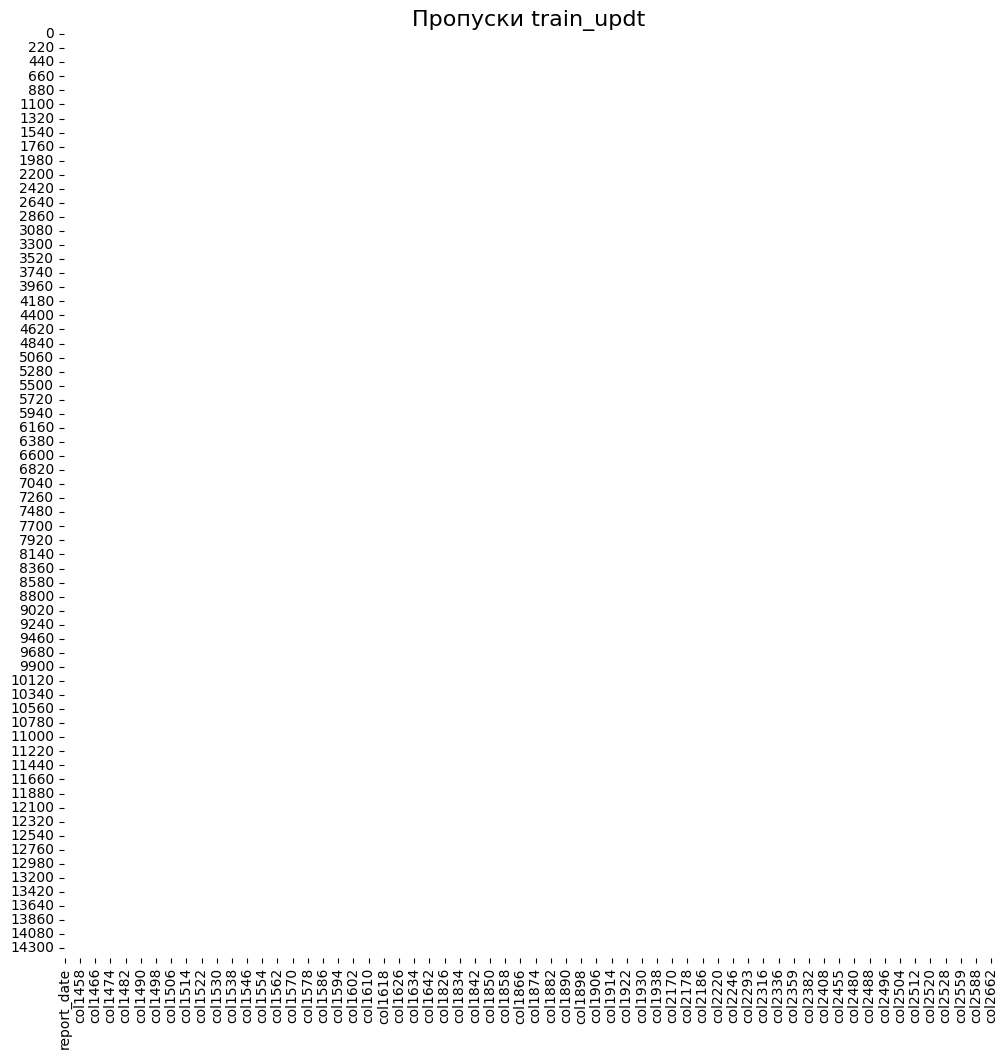

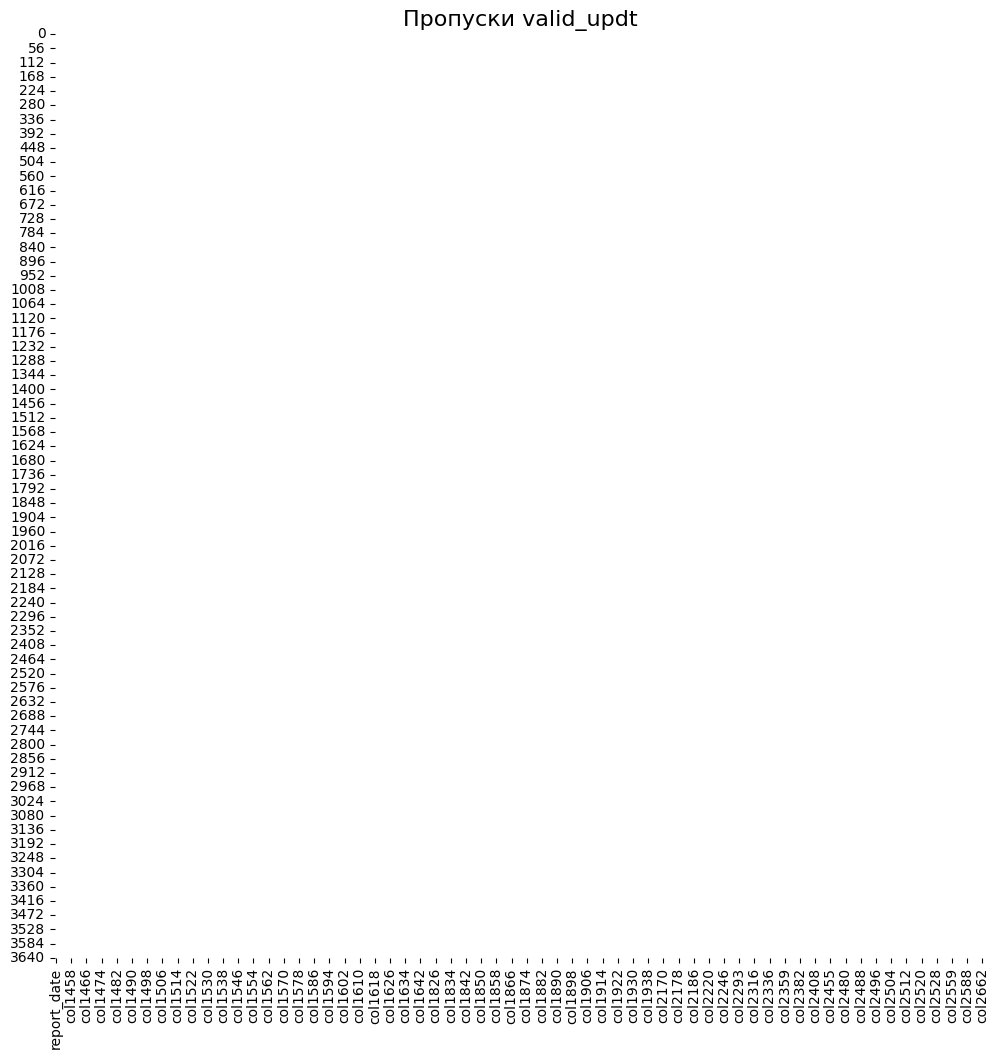

In [36]:
for i, elem in enumerate(arr_updt): 
      fig, ax = plt.subplots(figsize=(12, 12))
      sns.heatmap(elem.isnull(), cbar = False, cmap = 'Greys')
      plt.title(f"Пропуски {names_df_updt[i]}", fontsize=16)
      plt.show()

In [37]:
train_updt.head(3)

,report_date,client_id,target,col1453,col1454,col1455,col1456,col1457,col1458,col1459,...,col2588,col2589,col2590,col2654,col2655,col2656,col2660,col2661,col2662,col2663
0,2022-11-01,1,0,0,00f3d719-a6ec-4960-ba01-8372eb705443,0.0,0.0,0.0,0.0,0.0,...,242.0,242.0,242.0,6240000.0,6164000.0,6224000.0,6244578.0,6146773.5,6225550.0,0.256261
1,2022-11-01,5,0,1,01febac0-b083-494e-8589-f98400074b94,0.0,0.0,0.0,0.0,0.0,...,362.0,362.0,362.0,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,0.256261
2,2022-05-01,6,0,0,0278175e-c0bb-4e1e-bfe5-20db6811d3e2,0.0,0.0,0.0,0.0,1.0,...,242.0,242.0,242.0,6240000.0,6164000.0,6224000.0,6244578.0,6146773.5,6225550.0,0.256261


In [38]:
valid_updt.head(3)

,report_date,client_id,target,col1453,col1454,col1455,col1456,col1457,col1458,col1459,...,col2588,col2589,col2590,col2654,col2655,col2656,col2660,col2661,col2662,col2663
0,2023-04-01,2,0,0,01016bd5-10dc-ec11-b823-005056b825cd,0.0,0.0,0.0,0.0,0.0,...,240.0,240.0,240.0,4941670.0,4941670.0,4941670.0,4941670.0,4941670.0,4941670.0,0.256919
1,2023-05-01,4,0,0,0151dccf-0ecb-ed11-b828-005056b81dee,0.0,0.0,1.0,1.0,1.0,...,360.0,360.0,360.0,11789500.0,11789500.0,11789500.0,11789500.0,11789500.0,11789500.0,0.267221
2,2023-05-01,9,0,0,074ce8a6-859a-4084-a1c6-41343a94a856,0.0,0.0,0.0,0.0,0.0,...,348.0,348.0,348.0,7000000.0,7000000.0,7000000.0,7000000.0,7000000.0,7000000.0,0.257217


Модель RandomForestClassifier

In [39]:
X = train_updt.drop(columns=['client_id', 'target', 'report_date'])
y = train_updt['target']

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

X[categorical_features] = X[categorical_features].astype(str)

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced'))
])

Test
Accuracy: 0.9844
ROC-AUC: 0.9429
Скор сохранен.


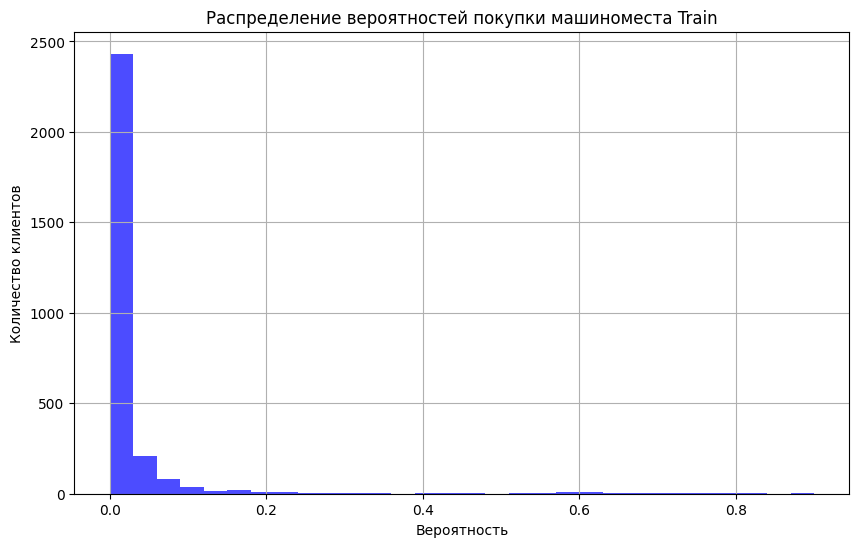


*******************************************************************************

Valid
Accuracy: 0.9824
ROC-AUC: 0.7064
Скор сохранен.


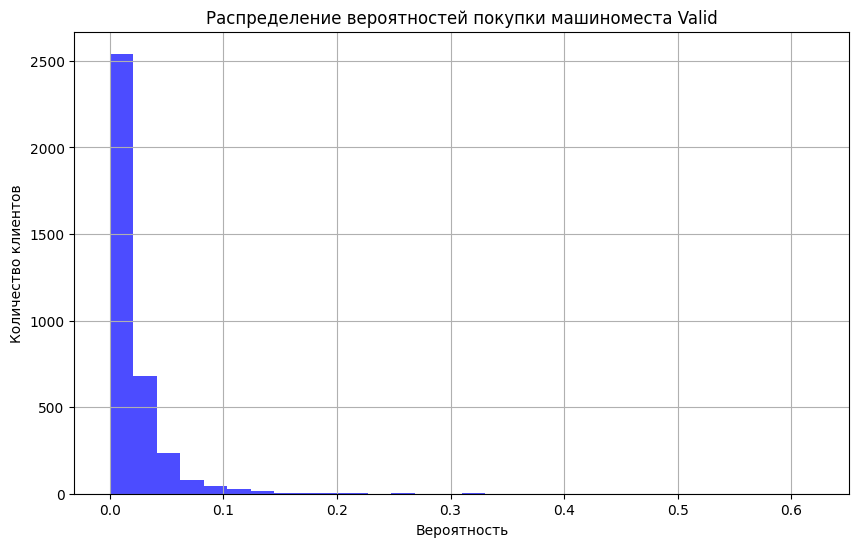

In [40]:
def viz_out(proba, val):
      arrs = ['Train', 'Valid']
      plt.figure(figsize=(10, 6))
      plt.hist(proba, bins=30, color='blue', alpha=0.7)
      plt.title(f'Распределение вероятностей покупки машиноместа {arrs[val]}')
      plt.xlabel('Вероятность')
      plt.ylabel('Количество клиентов')
      plt.grid()
      plt.show()

def message_save():
      print("Скор сохранен.")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
model.fit(X_train, y_train)

test_preds = model.predict(X_test)
test_preds_proba = model.predict_proba(X_test)[:, 1]
test_score = roc_auc_score(y_test, test_preds_proba)

print('Test')
# доля правильно предсказанных наблюдений к общему числу наблюдений. 
print(f"Accuracy: {accuracy_score(y_test, test_preds):.4f}")
# ROC - это график, показывающий соотношение между TPR (True Positive Rate) и FPR (False Positive Rate
# AUC - это площадь под ROC-кривой
print(f"ROC-AUC: {test_score:.4f}")

submission_test = pd.DataFrame({'client_id': train_updt.loc[X_test.index, 'client_id'], 'score': test_preds_proba})
submission_test.to_csv('results/rf_train.csv', index=False)
message_save()
viz_out(test_preds_proba, 0)

#########################################################################################
perenos_()

X_valid = valid_updt.drop(columns=['client_id', 'target', 'report_date'], errors='ignore')
y_valid = valid_updt['target']
X_valid[categorical_features] = X_valid[categorical_features].astype(str)

valid_preds = model.predict(X_valid)
valid_preds_proba = model.predict_proba(X_valid)[:, 1]
valid_score = roc_auc_score(y_valid, valid_preds_proba)

print('Valid')
print(f"Accuracy: {accuracy_score(y_valid, valid_preds):.4f}")
print(f"ROC-AUC: {valid_score:.4f}")

submission_valid = pd.DataFrame({'client_id': valid_updt.loc[X_valid.index, 'client_id'], 'score': valid_preds_proba})
submission_valid.to_csv('results/rf_valid.csv', index=False)
message_save()
viz_out(valid_preds_proba, 1)

Построение ROS-кривых

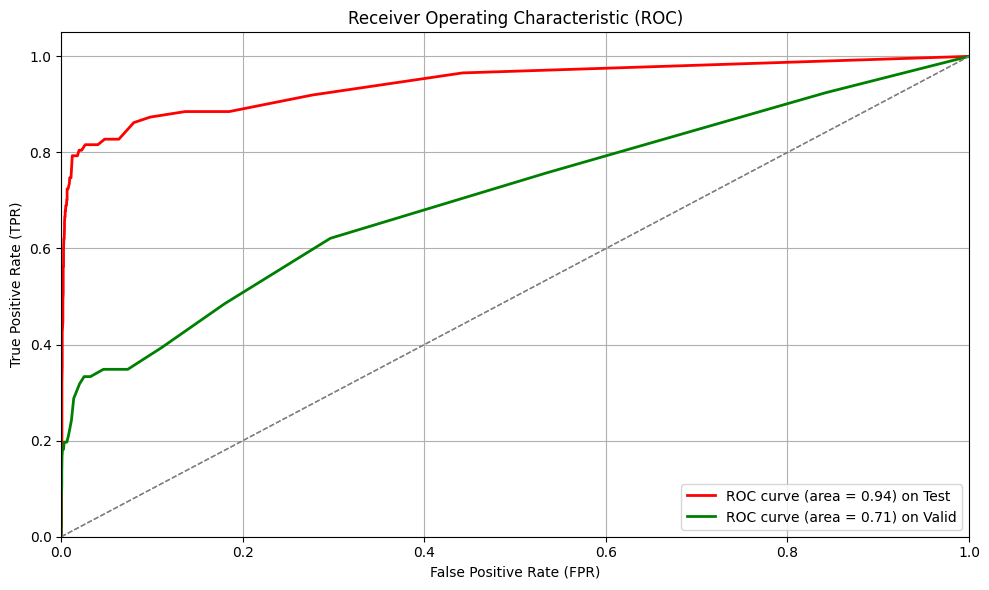

In [41]:
# ROC-кривая для test
fpr, tpr, thresholds = roc_curve(y_test, test_preds_proba)
ROC_test = roc_auc_score(y_test, test_preds_proba)

# ROC-кривая для valid
fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, valid_preds_proba)
ROC_valid = roc_auc_score(y_valid, valid_preds_proba)

plt.figure(figsize=(10, 6))

# Вывод test
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (area = {ROC_test:.2f}) on Test')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)  # Диагональная линия
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)

# Вывод valid
plt.plot(fpr_valid, tpr_valid, color='green', lw=2, label=f'ROC curve (area = {ROC_valid:.2f}) on Valid')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)  # Диагональная линия
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)

plt.tight_layout()
plt.show()

Модель XGBoost

Test
Accuracy: 0.9841
ROC-AUC: 0.9543
Скор сохранен.


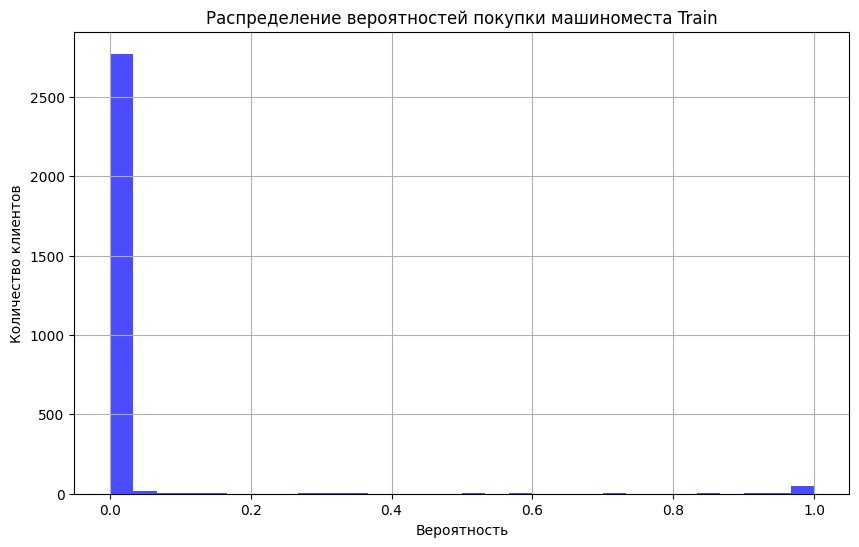


*******************************************************************************

Valid
Accuracy: 0.9838
ROC-AUC: 0.7652
Скор сохранен.


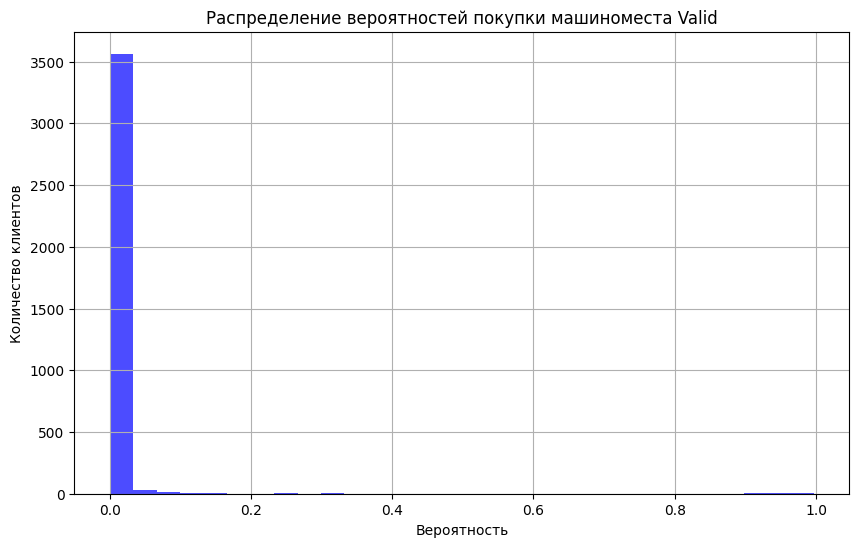

In [42]:
# Т.к. XGBoost не может обрабатывать столбцы типа object (строковые) без предварительной обработки. 
# Сделаем предварительные обработки

# Использование fit_transform для обучающего набора = обучаете 
X_train_transformed = preprocessor.fit_transform(X_train)
# transform для тестового и валидационного наборов = применяете
X_test_transformed = preprocessor.transform(X_test)
X_valid_transformed = preprocessor.transform(X_valid)

# Создание и обучение модели XGBoost
model_xgb = XGBClassifier(scale_pos_weight=len(y_train) / sum(y_train == 1),
                      random_state=42,
                      eval_metric='logloss',
                      max_depth=30,
                      n_estimators=500,
                      learning_rate=0.1)

model_xgb.fit(X_train_transformed, y_train)

test_preds_xgb = model_xgb.predict(X_test_transformed)
test_preds_proba_xgb = model_xgb.predict_proba(X_test_transformed)[:, 1]
test_score_xgb = roc_auc_score(y_test, test_preds_proba_xgb)

print('Test')
print(f"Accuracy: {accuracy_score(y_test, test_preds_xgb):.4f}")
print(f"ROC-AUC: {test_score_xgb:.4f}")

submission_test = pd.DataFrame({'client_id': train_updt.loc[X_test.index, 'client_id'], 'score': test_preds_proba_xgb})
submission_test.to_csv('results/xgb_train.csv', index=False)
message_save()
viz_out(test_preds_proba_xgb, 0)

#########################################################################################
perenos_()

valid_preds_xgb = model_xgb.predict(X_valid_transformed)
valid_preds_proba_xgb = model_xgb.predict_proba(X_valid_transformed)[:, 1]
valid_score_xgb = roc_auc_score(y_valid, valid_preds_proba_xgb)

print('Valid')
print(f"Accuracy: {accuracy_score(y_valid, valid_preds_xgb):.4f}")
print(f"ROC-AUC: {valid_score_xgb:.4f}")

submission_valid = pd.DataFrame({'client_id': valid_updt.loc[X_valid.index, 'client_id'], 'score': valid_preds_proba_xgb})
submission_valid.to_csv('results/xgb_valid.csv', index=False)
message_save()
viz_out(valid_preds_proba_xgb, 1)

Построение ROS-кривых

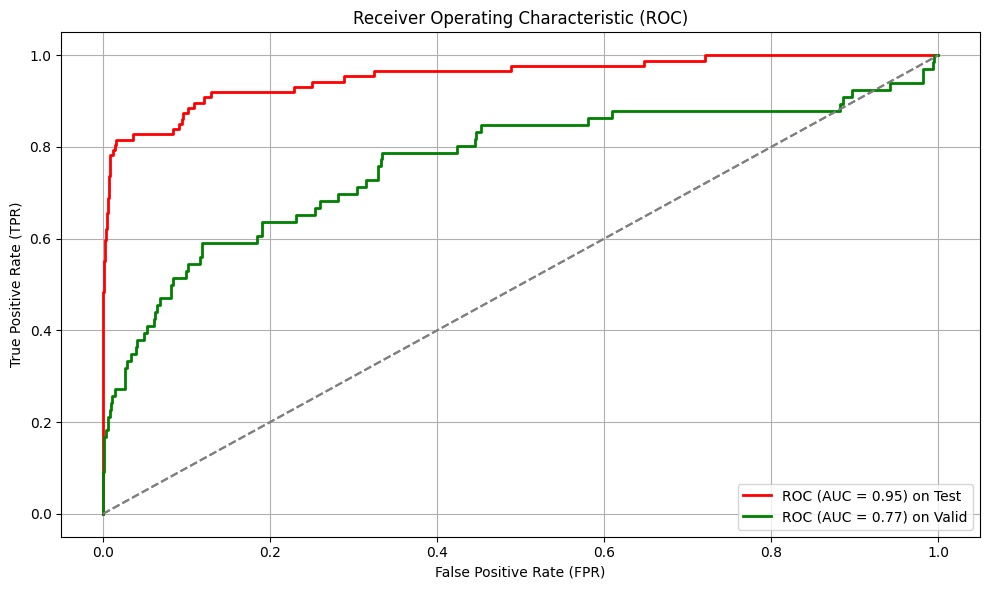

In [43]:
# ROC-кривая для test
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, test_preds_proba_xgb)
ROC_test_xgb = roc_auc_score(y_test, test_preds_proba_xgb)

# ROC-кривая для valid
fpr_valid_xgb, tpr_valid_xgb, thresholds_valid_xgb = roc_curve(y_valid, valid_preds_proba_xgb)
ROC_valid_xgb = roc_auc_score(y_valid, valid_preds_proba_xgb)

plt.figure(figsize=(10, 6))

# Вывод test
plt.plot(fpr_xgb, tpr_xgb, color='red', lw=2, label=f'ROC (AUC = {ROC_test_xgb:.2f}) on Test')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Случайная классификация
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid(True)

# Вывод valid
plt.plot(fpr_valid_xgb, tpr_valid_xgb, color='green', lw=2, label=f'ROC (AUC = {ROC_valid_xgb:.2f}) on Valid')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Случайная классификация
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid(True)

plt.tight_layout()
plt.show()

Модель LightGBM

[LightGBM] [Info] Number of positive: 349, number of negative: 11215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023857 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 19686
[LightGBM] [Info] Number of data points in the train set: 11564, number of used features: 225
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000

Test
Accuracy: 0.9291
ROC-AUC: 0.9493
Скор сохранен.


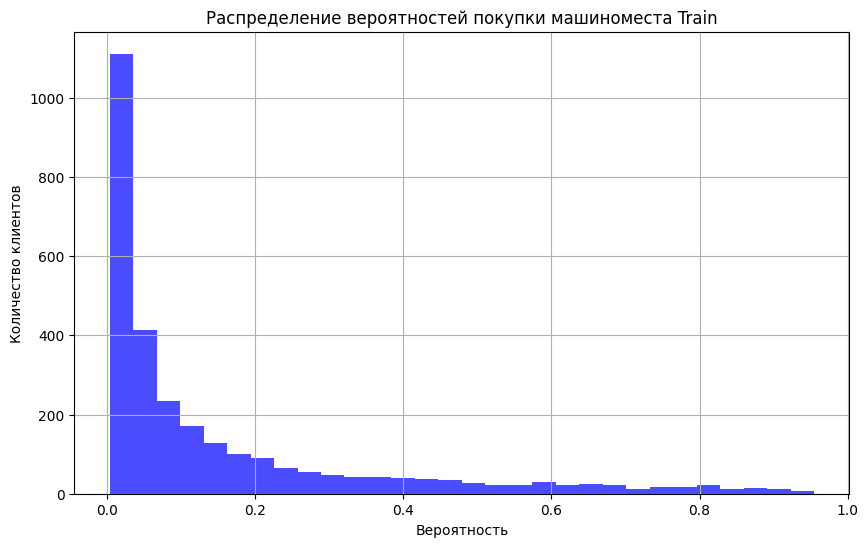


*******************************************************************************

Valid
Accuracy: 0.9506
ROC-AUC: 0.7550
Скор сохранен.


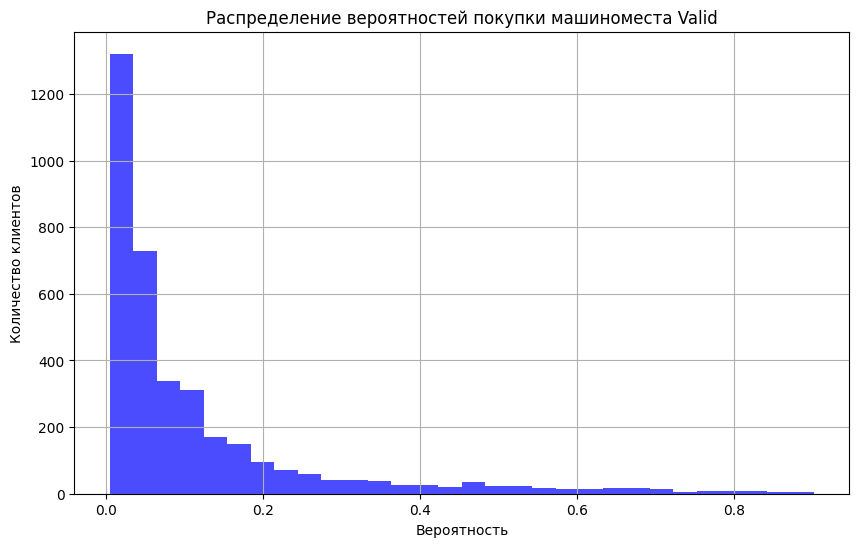

In [44]:
# Игнорирование FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

# Установка переменной окружения
os.environ["LOKY_MAX_CPU_COUNT"] = "4"

lgb_model = LGBMClassifier(boosting_type='gbdt',
    objective='binary',
    class_weight='balanced',
    learning_rate=0.01, n_estimators=500, num_leaves=20, min_child_samples=30, random_state=42)

lgb_model.fit(X_train_transformed, y_train)

test_preds_lgb = lgb_model.predict(X_test_transformed)
test_preds_proba_lgb = lgb_model.predict_proba(X_test_transformed)[:, 1]
test_score_lgb = roc_auc_score(y_test, test_preds_proba_lgb)

print('\nTest')
print(f"Accuracy: {accuracy_score(y_test, test_preds_lgb):.4f}")
print(f"ROC-AUC: {test_score_lgb:.4f}")

submission_test = pd.DataFrame({'client_id': train_updt.loc[X_test.index, 'client_id'], 'score': test_preds_proba_lgb})
submission_test.to_csv('results/lgb_train.csv', index=False)
message_save()
viz_out(test_preds_proba_lgb, 0)

#########################################################################################
perenos_()

valid_preds_lgb = lgb_model.predict(X_valid_transformed)
valid_preds_proba_lgb = lgb_model.predict_proba(X_valid_transformed)[:, 1]
valid_score_lgb = roc_auc_score(y_valid, valid_preds_proba_lgb)

print('Valid')
print(f"Accuracy: {accuracy_score(y_valid, valid_preds_lgb):.4f}")
print(f"ROC-AUC: {valid_score_lgb:.4f}")

submission_valid = pd.DataFrame({'client_id': valid_updt.loc[X_valid.index, 'client_id'], 'score': valid_preds_proba_lgb})
submission_valid.to_csv('results/lgb_valid.csv', index=False)
message_save()
viz_out(valid_preds_proba_lgb, 1)

Построение ROS-кривых

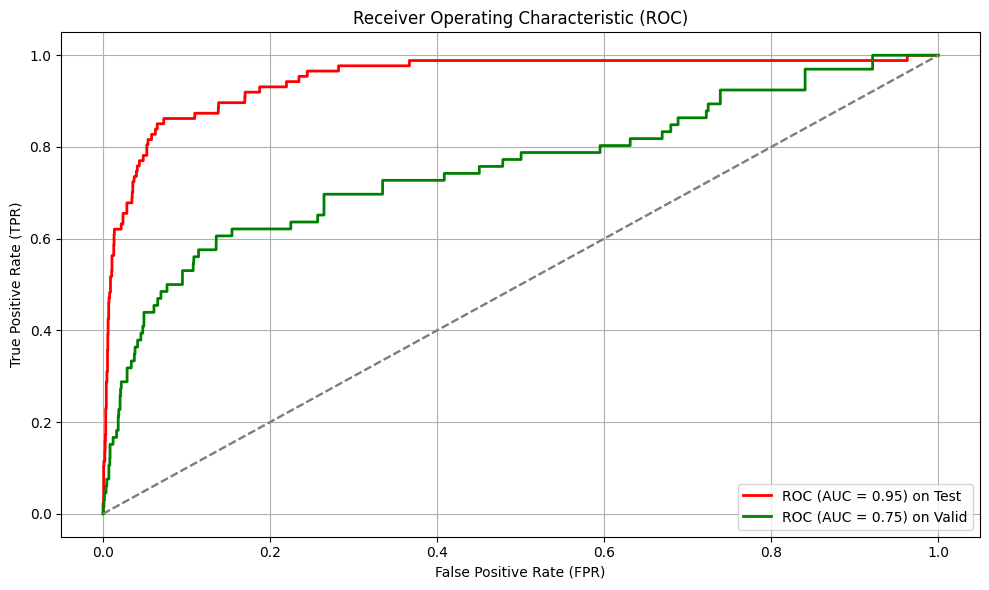

In [45]:
# ROC-кривая для test
fpr_lgb, tpr_lgb, thresholds_lgb = roc_curve(y_test, test_preds_proba_lgb)
ROC_test_lgb = roc_auc_score(y_test, test_preds_proba_lgb)

# ROC-кривая для valid
fpr_valid_lgb, tpr_valid_lgb, thresholds_valid_lgb = roc_curve(y_valid, valid_preds_proba_lgb)
ROC_valid_lgb = roc_auc_score(y_valid, valid_preds_proba_lgb)

plt.figure(figsize=(10, 6))

# Вывод test
plt.plot(fpr_lgb, tpr_lgb, color='red', lw=2, label=f'ROC (AUC = {ROC_test_lgb:.2f}) on Test')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Случайная классификация
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid(True)

# Вывод valid
plt.plot(fpr_valid_lgb, tpr_valid_lgb, color='green', lw=2, label=f'ROC (AUC = {ROC_valid_lgb:.2f}) on Valid')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Случайная классификация
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid(True)

plt.tight_layout()
plt.show()

вывод, самая лучшая модель Модель XGBoost